# Proyecto Coppel
### Autor: René Manzano
### Datos: Los datos se proporcionaron durante el curso.

In [13]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [14]:
gdf = pd.read_csv('data/Coppel.csv')
gdf.head()

,Unnamed: 0,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,1,6391609,COBRANZA COPPEL RINCÓN DE ROMOS,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,ALVARO OBREGÓN,AVENIDA,...,Rincón de Romos,0063,15,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,22.230515,-102.320959,DICIEMBRE 2014
1,2,6701632,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,ALDAMA,AVENIDA,...,Jesús María,0020,44,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.960361,-102.344098,ENERO 2016
2,3,6281076,COPPEL 5 DE MAYO 55,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,5 DE MAYO,CALLE,...,Aguascalientes,0500,23,4.499181e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.886399,-102.297193,JULIO 2010
3,4,6773776,COPPEL ALDAMA 1135,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,ALDAMA,AVENIDA,...,Jesús María,0020,44,1.449414e+10,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM.MX,Fijo,21.960365,-102.344097,OCTUBRE 2016
4,5,6282087,COPPEL ASUNCIÓN 397,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,AVENIDA,SIGLO XXI,CALLE,...,Aguascalientes,3098,12,4.491391e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.926912,-102.266211,JULIO 2010


In [15]:
from shapely.geometry import Point, Polygon, LineString
l = [Point(xy) for xy in zip(gdf.longitud,gdf.latitud)]
gdf = gpd.GeoDataFrame(gdf,geometry=l)

In [16]:
gdf = gdf.fillna(0)
gdf['direccion'] = gdf.nom_vial+' '+\
                    gdf.numero_ext.astype(int).astype(str)\
                    +', '+gdf.cod_postal.astype(int).astype(str)\
                    +', '+gdf.municipio

In [17]:
gdf.crs = {'init' :'epsg:4326'}

In [18]:
gdf = gdf.to_crs({'init': 'epsg:3395'})

In [19]:
gdf.head()

,Unnamed: 0,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry,direccion
0,1,6391609,COBRANZA COPPEL RINCÓN DE ROMOS,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,ALVARO OBREGÓN,AVENIDA,...,15,0.000000e+00,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,22.230515,-102.320959,DICIEMBRE 2014,POINT (-11390317.04556706 2523064.742091118),"ALVARO OBREGÓN 114, 20400, Rincón de Romos"
1,2,6701632,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,ALDAMA,AVENIDA,...,44,0.000000e+00,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.960361,-102.344098,ENERO 2016,POINT (-11392892.83386867 2490794.349628269),"ALDAMA 107, 20900, Jesús María"
2,3,6281076,COPPEL 5 DE MAYO 55,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,5 DE MAYO,CALLE,...,23,4.499181e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.886399,-102.297193,JULIO 2010,POINT (-11387671.4187565 2481970.3147489),"5 DE MAYO 524, 20000, Aguascalientes"
3,4,6773776,COPPEL ALDAMA 1135,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,ALDAMA,AVENIDA,...,44,1.449414e+10,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM.MX,Fijo,21.960365,-102.344097,OCTUBRE 2016,POINT (-11392892.70919085 2490794.764919729),"ALDAMA 107, 20920, Jesús María"
4,5,6282087,COPPEL ASUNCIÓN 397,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,AVENIDA,SIGLO XXI,CALLE,...,12,4.491391e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.926912,-102.266211,JULIO 2010,POINT (-11384222.5494622 2486803.15645469),"SIGLO XXI 2302, 20126, Aguascalientes"


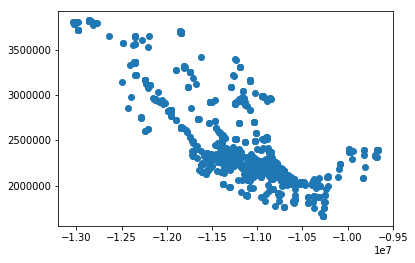

In [20]:
%matplotlib inline
gdf.plot()

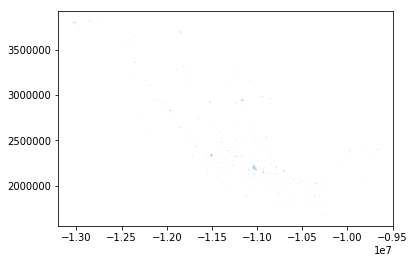

In [21]:
b = pd.DataFrame(gdf.values, columns= gdf.columns)
b = gpd.GeoDataFrame(b,geometry = b.geometry)
b.geometry = b.buffer(1000) # Buffer genera un poligono (círculo) al rededor de cada punto en geometry
%matplotlib inline
b.plot()

In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [45]:
textplotsize = 11
rcParams['axes.labelsize'] = textplotsize
rcParams['xtick.labelsize'] = textplotsize
rcParams['ytick.labelsize'] = textplotsize
rcParams['legend.fontsize'] = textplotsize
rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams['text.usetex'] = True
rcParams['savefig.dpi'] = 200
from matplotlib.ticker import MaxNLocator
my_locator = MaxNLocator(8)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

(-13201885.725384835, -9495756.877885338)

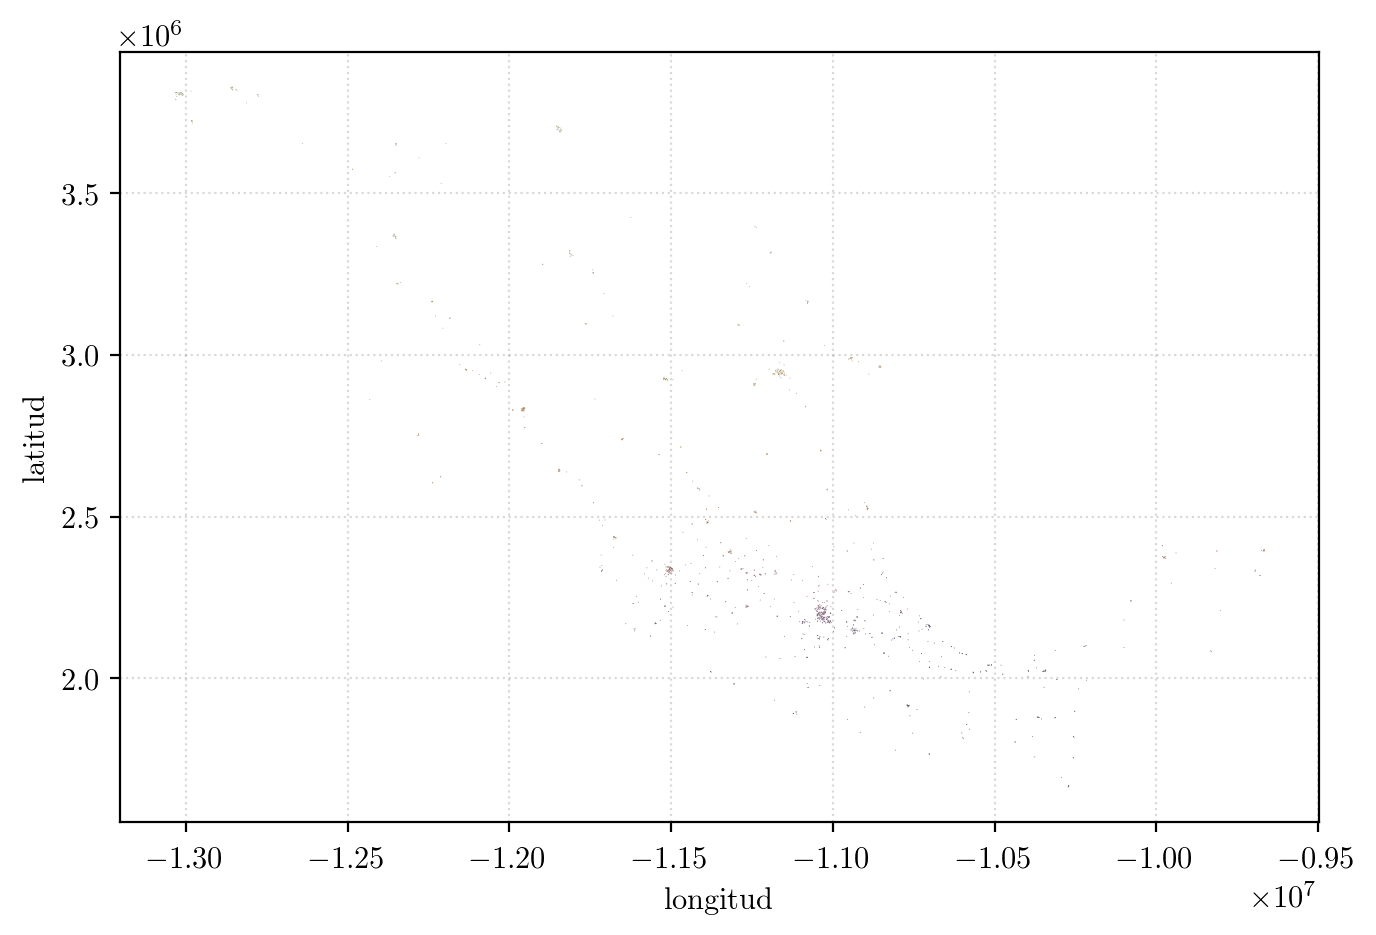

In [47]:
#Solo haciendo copy paste ya se ven mejor las figuras
scale = 400 # Controla el tamaño de la figura, ojo: no amplifica todo, por ejemplo la fuente.
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
#########################################
ax.set_aspect('equal')
###########################################
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_xlabel('longitud')
ax.set_ylabel('latitud')

ax.grid(True, color='black', ls=':', alpha=0.15)
graf = b.plot(ax=ax,column='latitud', cmap='inferno', alpha=0.75,edgecolor=(0.5,0.5,0.5),lw=0.1)
graf.get_xlim()

In [34]:
b.head()

,Unnamed: 0,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry,direccion
index_left,,,,,,,,,,,,,,,,,,,,,
0,1,6391609,COBRANZA COPPEL RINCÓN DE ROMOS,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,ALVARO OBREGÓN,AVENIDA,...,15,0,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,22.2305,-102.321,DICIEMBRE 2014,POLYGON ((-11389317.04556706 2523064.742091118...,"ALVARO OBREGÓN 114, 20400, Rincón de Romos"
1,2,6701632,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,ALDAMA,AVENIDA,...,44,0,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.9604,-102.344,ENERO 2016,POLYGON ((-11391892.83386867 2490794.349628269...,"ALDAMA 107, 20900, Jesús María"
2,3,6281076,COPPEL 5 DE MAYO 55,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,5 DE MAYO,CALLE,...,23,4.49918e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.8864,-102.297,JULIO 2010,"POLYGON ((-11386671.4187565 2481970.3147489, -...","5 DE MAYO 524, 20000, Aguascalientes"
3,4,6773776,COPPEL ALDAMA 1135,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,ALDAMA,AVENIDA,...,44,1.44941e+10,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM.MX,Fijo,21.9604,-102.344,OCTUBRE 2016,POLYGON ((-11391892.70919085 2490794.764919729...,"ALDAMA 107, 20920, Jesús María"
4,5,6282087,COPPEL ASUNCIÓN 397,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,AVENIDA,SIGLO XXI,CALLE,...,12,4.49139e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.9269,-102.266,JULIO 2010,"POLYGON ((-11383222.5494622 2486803.15645469, ...","SIGLO XXI 2302, 20126, Aguascalientes"


In [22]:
dfp = pd.read_csv('data/probe.probe')
def hacer_punto(row):
    p = Point(row.x,row.y)
    return p
dfp['geometry'] = dfp.apply(hacer_punto,axis=1)
dfp = gpd.GeoDataFrame(dfp,geometry='geometry')

In [23]:
dfp.crs = {'init' :'epsg:4326'}

In [24]:
dfp = dfp.to_crs({'init': 'epsg:3395'})

In [25]:
b.crs={'init': 'epsg:3395'}

In [26]:
u = gpd.sjoin(b,dfp,how='inner',op='intersects')
u

,Unnamed: 0_left,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,fecha_alta,geometry,direccion,index_right,Unnamed: 0_right,timestamp,x,y,speed,provider
0,1,6391609,COBRANZA COPPEL RINCÓN DE ROMOS,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,ALVARO OBREGÓN,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389317.04556706 2523064.742091118...,"ALVARO OBREGÓN 114, 20400, Rincón de Romos",798673,1697721,2017-03-30T02:55:51Z,-102.321400,22.226288,26.268300,4
7,8,6391527,COPPEL MORELOS 1029,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,FRANCISCO I. MADERO,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389347.37344913 2523008.563205542...,"FRANCISCO I. MADERO 1357, 20400, Rincón de Romos",798673,1697721,2017-03-30T02:55:51Z,-102.321400,22.226288,26.268300,4
0,1,6391609,COBRANZA COPPEL RINCÓN DE ROMOS,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,ALVARO OBREGÓN,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389317.04556706 2523064.742091118...,"ALVARO OBREGÓN 114, 20400, Rincón de Romos",846067,6826679,2017-03-30T15:49:58Z,-102.315028,22.227303,0.000000,1
7,8,6391527,COPPEL MORELOS 1029,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,FRANCISCO I. MADERO,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389347.37344913 2523008.563205542...,"FRANCISCO I. MADERO 1357, 20400, Rincón de Romos",846067,6826679,2017-03-30T15:49:58Z,-102.315028,22.227303,0.000000,1
0,1,6391609,COBRANZA COPPEL RINCÓN DE ROMOS,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,ALVARO OBREGÓN,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389317.04556706 2523064.742091118...,"ALVARO OBREGÓN 114, 20400, Rincón de Romos",970197,11339732,2017-03-30T22:58:31Z,-102.321420,22.227741,2.736000,4
7,8,6391527,COPPEL MORELOS 1029,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,FRANCISCO I. MADERO,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389347.37344913 2523008.563205542...,"FRANCISCO I. MADERO 1357, 20400, Rincón de Romos",970197,11339732,2017-03-30T22:58:31Z,-102.321420,22.227741,2.736000,4
0,1,6391609,COBRANZA COPPEL RINCÓN DE ROMOS,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,ALVARO OBREGÓN,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389317.04556706 2523064.742091118...,"ALVARO OBREGÓN 114, 20400, Rincón de Romos",696883,8662973,2017-03-30T18:42:10Z,-102.321010,22.227796,0.000000,1
7,8,6391527,COPPEL MORELOS 1029,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,FRANCISCO I. MADERO,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389347.37344913 2523008.563205542...,"FRANCISCO I. MADERO 1357, 20400, Rincón de Romos",696883,8662973,2017-03-30T18:42:10Z,-102.321010,22.227796,0.000000,1
0,1,6391609,COBRANZA COPPEL RINCÓN DE ROMOS,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,ALVARO OBREGÓN,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389317.04556706 2523064.742091118...,"ALVARO OBREGÓN 114, 20400, Rincón de Romos",213414,8662324,2017-03-30T18:42:10Z,-102.321010,22.227796,0.000000,1
7,8,6391527,COPPEL MORELOS 1029,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,FRANCISCO I. MADERO,AVENIDA,...,DICIEMBRE 2014,POLYGON ((-11389347.37344913 2523008.563205542...,"FRANCISCO I. MADERO 1357, 20400, Rincón de Romos",213414,8662324,2017-03-30T18:42:10Z,-102.321010,22.227796,0.000000,1


In [27]:
u.groupby('id').agg(['count'])

,Unnamed: 0_left,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,fecha_alta,geometry,direccion,index_right,Unnamed: 0_right,timestamp,x,y,speed,provider
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
id,,,,,,,,,,,,,,,,,,,,,
438084,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
671005,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
1456688,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
1634945,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
1667963,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
1760339,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
1919146,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
2477792,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
